In [1]:
## MODULES ##
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300
import cmcrameri.cm as cmc
import cartopy.feature as cf                                                                                                        
from pathlib import Path
import psyplot.project as psy
import sys
from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray
import pandas as pd
import datetime as dt
import numpy as np
import sys
import pickle
import matplotlib.patheffects as PathEffects

# #own scripts
sys.path.append('../utilities_tlezuo/')
import locfunctions as lf
import varfunctions as vf
from timefunctions import *

from ipdb import set_trace

#  define class of pc_dict
class Point_coordinates:
    def __init__(self, shortname, name, color, marker, lat, lon, altitude, iconID, iconHSURF, iconHHL, iconHFL, height_dict):
        self.short = shortname
        self.name = name
        self.color = color
        self.marker = marker
        self.lat = lat
        self.lon = lon
        self.alt = altitude
        self.iconID = iconID 
        self.iconHSURF = iconHSURF
        self.iconHHL = iconHHL
        self.iconHFL = iconHFL
        self.hdict = height_dict 


# load pc_dict and its lists
pc_dict = np.load('../utilities_tlezuo/pc_dict.npy',allow_pickle=True).item()
with open ('../utilities_tlezuo/pc_iconID_list','rb') as f:
    pc_iconID_list = pickle.load(f)
with open ('../utilities_tlezuo/pc_short_list','rb') as a:
    pc_short_list = pickle.load(a)

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
###############################################################################################
## CONSTANT FILE  ##
c_filename = "lfff00000000c.nc"
filepath = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'
const_file = filepath + c_filename
data_c = psy.open_dataset(const_file)


plotting area stations area
     plotting variable HSURF


/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':
/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_maps/plotters.py:1691: UserWarning: Filled contour plots of unstructured data are not correctly warped around!
  warnings.warn('Filled contour plots of unstructured data are not '


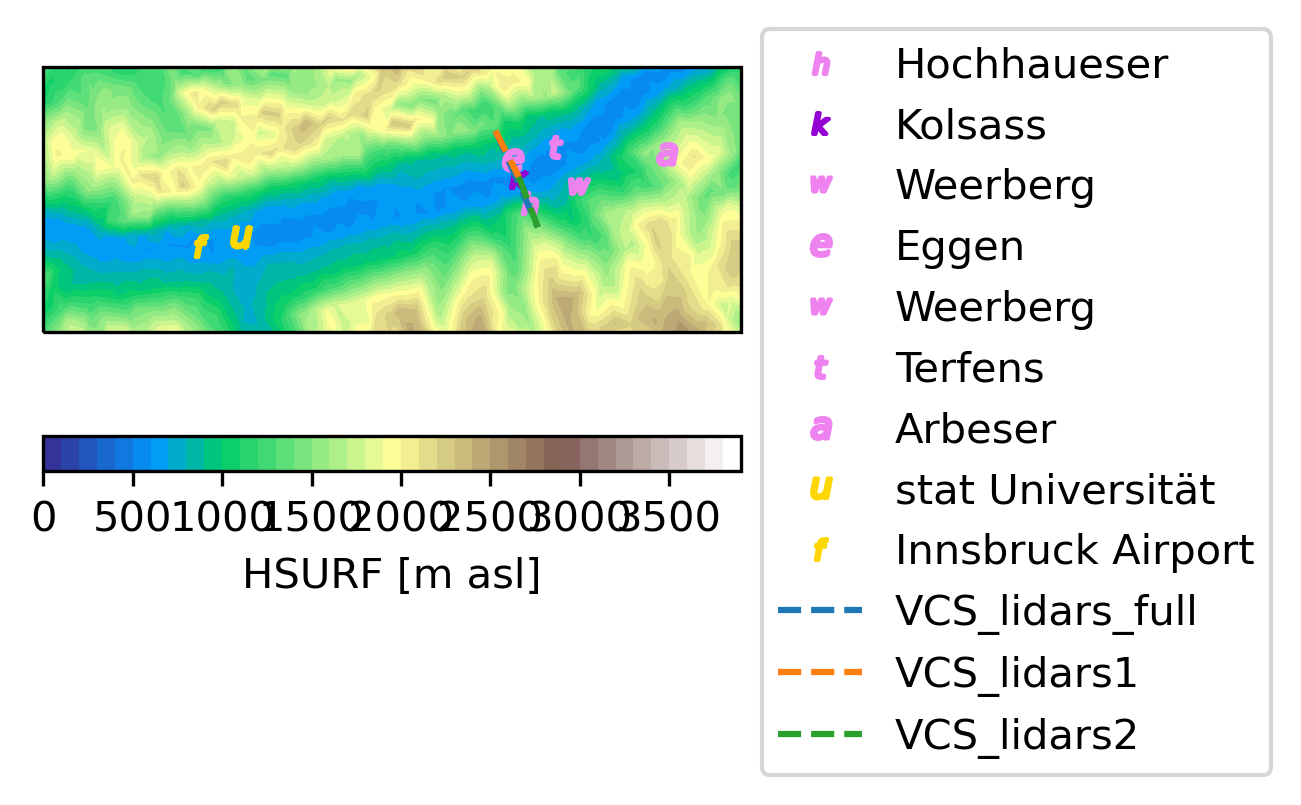

In [3]:

###############################################################################################
## DECIDE ##
# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/hor_cross/'
# decide which areas to plot
area=lf.stat_only

# decide which variables to plot
pvar = vf.HSURF
# decide how to plot it
plottype = 'contourf' # 'poly' = triangles,'contourf'= smoothed, 'contour'= lines
###############################################################################################
## PLOT SETUP ##
# loop 1 over areas
# check printout
print('plotting area '+area.name)

print('     plotting variable '+pvar.name )
# path sepcific to area and variable
plotpath = plotpath_base+str(area.name)+'/'+str(pvar.name)+'/'
Path(plotpath).mkdir(parents=True, exist_ok=True)

    
# title specific to area, variable, time
# title = 'ICON model '+pvar.title
plotname = str(area.name)+'_'+pvar.name+'_'+plottype+'.png'


###############################################################################################
## PLOT ##
#plot
# set_trace()
pp = psy.plot.mapplot(data_c,
    name = pvar.name,
    t = 0,
    projection = 'robin',
    plot=plottype,
    bounds = np.arange(pvar.min,pvar.max,pvar.ticks),#{'method': 'minmax', 'vmin':pvar.min, 'vmax':pvar.max},
    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
    # title = title,
    cmap=pvar.cmap,
    cticks=np.arange(pvar.min,pvar.max,pvar.ticks*5),
    clabel = pvar.name+' '+pvar.units,
    xgrid = False, ygrid = False,
    )
# set_trace()
#annotations
fig = plt.gcf()
fig.set_size_inches(3,3)
handles_list=[]
labels_list=[]
for locmark in area.locmarks:
    pos_lon, pos_lat = iconvis.add_coordinates(pc_dict[locmark].lon,pc_dict[locmark].lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    fig.axes[0].plot(pos_lon, pos_lat,color=pc_dict[locmark].color,marker=pc_dict[locmark].marker, markersize=5, transform=fig.axes[0].transAxes,label=pc_dict[locmark].name,linestyle='None') 
    # handles_list.append(locmark.marker)
    # labels_list.append(locmark.name)
    # if locmark.name == 'Station Flughafen':
    #     fig.axes[0].text(pos_lon-0.06, pos_lat+0.03,locmark.name, transform=fig.axes[0].transAxes,color=locmark.color,fontsize=16)
    #     fig.axes[0].plot(pos_lon, pos_lat,color=locmark.color,marker= '.', markersize=20, transform=fig.axes[0].transAxes,label=locmark.name,linestyle='None') 

VCS_lines = [lf.VCS_lidars_full,lf.VCS_lidars1,lf.VCS_lidars2]
for line in VCS_lines:
    lonmin, latmin = iconvis.add_coordinates(line.lonmin,line.latmin,area.lonmin,area.lonmax,area.latmin,area.latmax)
    lonmax, latmax = iconvis.add_coordinates(line.lonmax,line.latmax,area.lonmin,area.lonmax,area.latmin,area.latmax)
    lons = [lonmin,lonmax]
    lats = [latmin,latmax]
    
    fig.axes[0].plot(lons,lats,transform=fig.axes[0].transAxes, linestyle='--',label=line.short,zorder=100)
    # fig.axes[0].plot(lonmin, latmin,marker='x', markersize=5, transform=fig.axes[0].transAxes,linestyle='None') 
    # fig.axes[0].plot(lonmax, latmax,marker='x', markersize=5, transform=fig.axes[0].transAxes,linestyle='None') 
fig.legend(loc='upper left', bbox_to_anchor=(0.9, 0.7))
plt.rcParams['figure.dpi'] = 300
# save figure
pp.update()

In [4]:
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('terrain')
new_cmap = truncate_colormap(cmap, 0.25, 1)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


plotting area local_area
     plotting variable HSURF


/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/psy_simple/plugin.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if b is None or b == 'none':


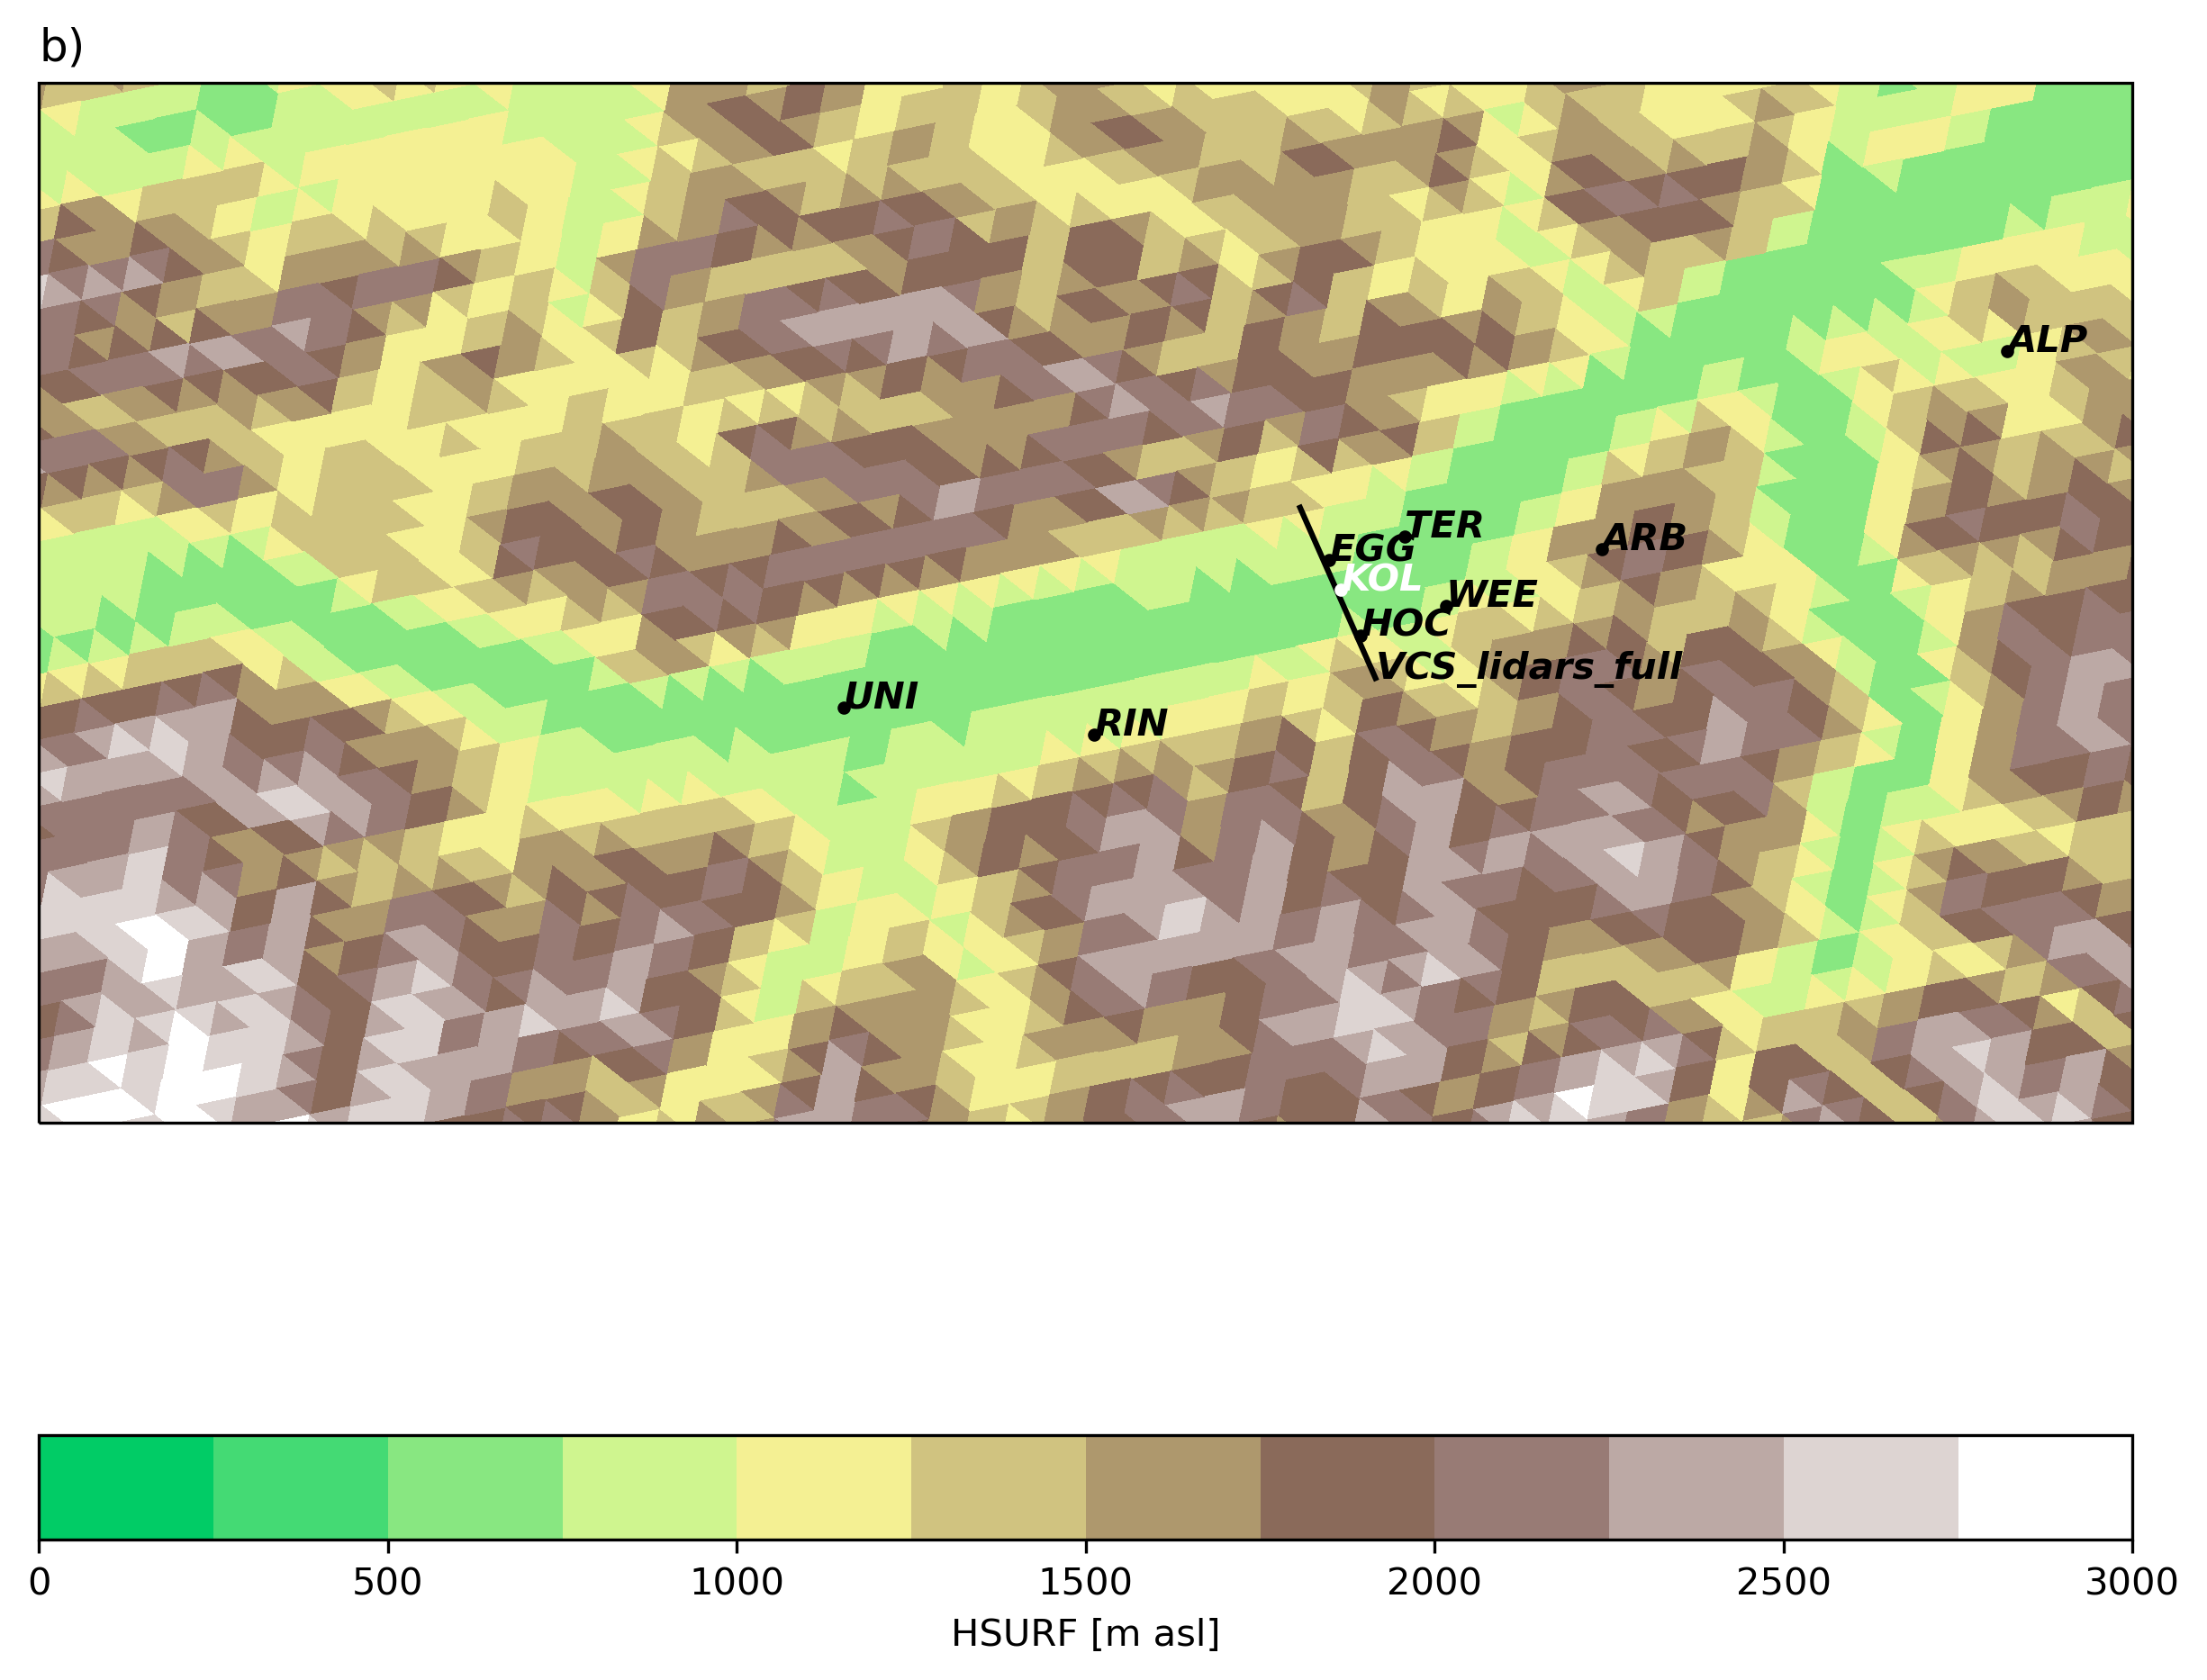

In [66]:
import matplotlib.patheffects as PathEffects
###############################################################################################
## DECIDE ##
# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/hor_cross/'
# INN AREA 
# area=lf.inn_area
# pc_innvalley_list = ['LAN','IMS','HAI','MUC','ALP','RIN','UNI','murs']
# VCS_lines = [lf.VCS_kols,lf.VCS_alp,lf.VCS_hai,lf.VCS_kuf,lf.VCS_av_full_T]
# lake_tf=True
# bord_tf=True
# ab='a)'

# LOCAL AREA
area=lf.local_area
pc_innvalley_list = ['egg','terf','hoch','kols','weer','arb','ALP','RIN','UNI']
VCS_lines = [lf.VCS_lidars_full]
lake_tf=False
bord_tf=False
ab='b)'

# decide which variables to plot
pvar = vf.HSURF
# decide how to plot it
plottype = 'poly' # 'poly' = triangles,'contourf'= smoothed, 'contour'= lines

###############################################################################################
## PLOT SETUP ##
# loop 1 over areas
# check printout
print('plotting area '+area.name)

print('     plotting variable '+pvar.name )
# path sepcific to area and variable
plotpath = plotpath_base+str(area.name)+'/'+str(pvar.name)+'/'
Path(plotpath).mkdir(parents=True, exist_ok=True)

    
# title specific to area, variable, time
# title = 'ICON model '+pvar.title
plotname = str(area.name)+'_'+pvar.name+'_'+plottype+'.png'



###############################################################################################
## PLOT ##
#plot
# set_trace()
pp = psy.plot.mapplot(data_c,
    name = pvar.name,
    t = 0,
    projection = 'robin',
    plot=plottype,
    bounds = np.arange(0,3001,250),#{'method': 'minmax', 'vmin':pvar.min, 'vmax':pvar.max},
        # bounds = ['minmax', 7]
    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
    # title = title,
    cmap=new_cmap,#pvar.cmap,
    cticks=np.arange(pvar.min,pvar.max,pvar.ticks*5),
    clabel = pvar.name+' '+pvar.units,
    xgrid = False, ygrid = False,
    cbar = 'b',
    lakes=lake_tf,
    borders=bord_tf
    )
# set_trace()
#annotations
fig = plt.figure
fig = plt.gcf()
fig.set_size_inches(10,10)
# plt.colorbar(cf,fraction=0.026, pad=0.03,ticks=[0,3000,100])
handles_list=[]
labels_list=[]


pc_dict['murs'].short = 'MUA'

pc_dict['kols'].short = 'KOL'
pc_dict['egg'].short = 'EGG'
pc_dict['terf'].short = 'TER'
pc_dict['arb'].short = 'ARB'
pc_dict['hoch'].short = 'HOC'
pc_dict['weer'].short = 'WEE'

for locmark in pc_innvalley_list:
    
    if pc_dict[locmark].short == 'KOL' or pc_dict[locmark].short == 'MUA' :
        col_marker = 'w'#'violet'
    else:
        col_marker = 'k'#'violet'
    pos_lon, pos_lat = iconvis.add_coordinates(pc_dict[locmark].lon,pc_dict[locmark].lat,area.lonmin,area.lonmax,area.latmin,area.latmax)
    mark = fig.axes[0].plot(pos_lon, pos_lat,color=col_marker,marker='.',markersize=5, transform=fig.axes[0].transAxes,label=pc_dict[locmark].name,linestyle='None',zorder=101)
                            #,path_effects=[PathEffects.Stroke(linewidth=3, foreground='k'), PathEffects.Normal()]) 
    mtxt = fig.axes[0].annotate(text=pc_dict[locmark].short,xy=(pos_lon, pos_lat),xycoords='axes fraction',zorder=100,color=col_marker, style = 'oblique',weight='bold')

    # mark.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
    # handles_list.append(locmark.marker)
    # labels_list.append(locmark.name)
    # if locmark.name == 'Station Flughafen':
    #     fig.axes[0].text(pos_lon-0.06, pos_lat+0.03,locmark.name, transform=fig.axes[0].transAxes,color=locmark.color,fontsize=16)
    #     fig.axes[0].plot(pos_lon, pos_lat,color=locmark.color,marker= '.', markersize=20, transform=fig.axes[0].transAxes,label=locmark.name,linestyle='None') 


## VCSs

for line in VCS_lines:
    if line.short == 'VCS_liadrs_full':
        col_line = 'k'
    else:
        col_line = 'k'
    lonmin, latmin = iconvis.add_coordinates(line.lonmin,line.latmin,area.lonmin,area.lonmax,area.latmin,area.latmax)
    lonmax, latmax = iconvis.add_coordinates(line.lonmax,line.latmax,area.lonmin,area.lonmax,area.latmin,area.latmax)
    lons = [lonmin,lonmax]
    lats = [latmin,latmax]

    if line.short == 'VCS_av':
        del_y = -0.03
    else:
        del_y = 0
    lin = fig.axes[0].plot(lons,lats,transform=fig.axes[0].transAxes, linestyle='solid',label=line.short,zorder=100,color=col_line)#,path_effects=[PathEffects.Stroke(linewidth=3, foreground='k'), PathEffects.Normal()])
    txt = fig.axes[0].annotate(text=line.short,xy=(lonmax,latmax+del_y),xycoords='axes fraction',zorder=100,color=col_line, style = 'oblique',weight='bold')
    # lin.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
    # txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])

plt.rcParams['figure.dpi'] = 300
plt.title(ab,loc='left')
plt.savefig('3_map_'+ab,dpi=300)
# save figure
pp.update()